# Raspberry waste ANN model

This tool is created to model selected energetical properties of raspberry cultivation waste. This implementation contains pre-trained artificial neural network model consisting of two branches with 9-4 shape. Overall accuracy vs training, validation and test dataset, measured as MAPE is 1.44, 1.88, 1.60 % respectively. Below is a list of the necessary libraries.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Input parameters

This section gather all input parameters required of the user. You can leave them as they are below, or enter your own.

| Variable   | Unit | Description                                               |
|------------|------|-----------------------------------------------------------|
| T_shoot    | [-]  | Total number of shoots on 1 bush                          |
| L_shoot    | [cm] | Total length of shoots on 1 bush                          |
| A_shoot    | [cm] | Average length of 1 shoot                                 |
| T_nonfruit | [cm] | Total length of the non-fruiting part of shoots of 1 bush |
| A_nonfruit | [cm] | Average length of the non-fruiting part of 1 shoot        |
| T_fruit    | [cm] | Total length of the fruiting part of shoots on 1 bush     |
| A_fruit    | [cm] | Average length of the fruiting part of 1 shoot            |
| T_buds     | [-]  | Total number of buds on 1 bush                            |
| A_buds     | [-]  | Average number of buds on 1 shoot                         |
| T_lateral  | [-]  | Total number of lateral branches on 1 bush                |
| T_lateral  | [-]  | Average number of lateral branches per 1 shoot            |
| d_0        | [mm] | Average diameter of shoots at 0 cm height                 |
| d_60       | [mm] | Average diameter of shoots at 60 cm height                |
| d_120      | [mm] | Average diameter of shoots at 120 cm height               |
| m          | [g]  | Average weight of 1 shoot                                 |

In [2]:
T_shoot = 8.0
L_shoot = 1221.0
A_shoot = 152.625
T_nonfruit = 741.0
A_nonfruit = 92.625
T_fruit = 547.625
A_fruit = 68.453
T_buds = 139.0
A_buds = 17.375
T_lateral = 89.0
A_lateral = 11.125
d_0 = 12.125
d_60 = 10.0
d_120 = 5.75
m = 118.75

### ANN model logic

In [3]:
model_to_load="ANN_model_deployed.pth"
ANN_instance=torch.load(model_to_load)
ANN_instance.eval()
input_array = [T_shoot, L_shoot, A_shoot, T_nonfruit, A_nonfruit, T_fruit, A_fruit, T_buds, A_buds, T_lateral, A_lateral, d_0, d_60, d_120, m]
input_array=np.reshape(input_array,(1,15))
input_tensor = torch.tensor(input_array, dtype=torch.float32)
output=ANN_instance(input_tensor.clone().detach()).detach().numpy()

### Results

This section process and visualize the results of the ANN

| Variable | Unit            | Description                                       |
|----------|-----------------|---------------------------------------------------|
| HHV      | [MJ⋅kg⁻¹]       | Higher Heating Value                              |
| LHV      | [MJ⋅kg⁻¹]       | Lower Heating Value                               |
| C        | [%]             | Total carbon content                              |
| H        | [%]             | Total hydrogen content                            |
| N        | [%]             | Total nitrogen content                            |
| O        | [%]             | Total oxygen content                              |
| A        | [%]             | Total ash content                                 |
| V        | [%]             | Total volatile matter content                     |
| FC       | [%]             | Fixed carbon index                                |
| V_co2    | [Nm³⋅kg⁻¹fuel]  | Content of carbon dioxide in the exhaus gas       |
| V_n2     | [Nm³⋅kg⁻¹fuel]  | Theoretical content of nitrogen in the exhaus gas |
| n_o2     | [Nm³⋅kg⁻¹fuel]  | Oxygen content in the exhaustgases                |
| V_ogu    | [Nm³⋅kg⁻¹fuel]  | The total volum of dry exhaust gases              |

HHV  : 17.464
LHV  : 16.257
C    : 44.150
H    : 7.533
N    : 1.005
O    : 44.052
A    : 2.695
V    : 71.443
FC   : 18.259
V_co2: 0.826
V_n2 : 4.344
n_o2 : 6.469
V_ogu: 5.154


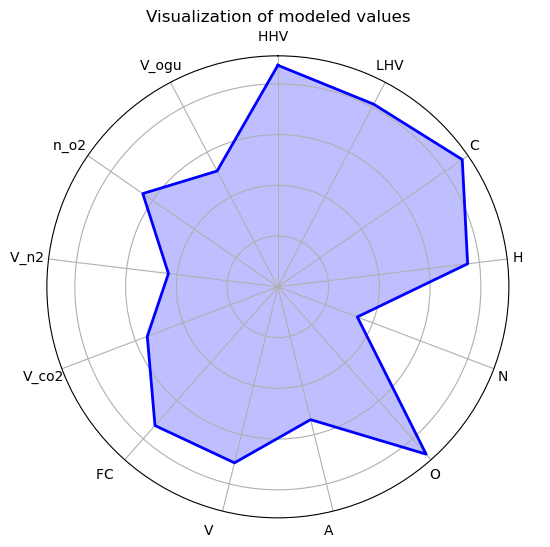

In [5]:
output_names = ['HHV  ','LHV  ','C    ','H    ','N    ','O    ','A    ','V    ','FC   ','V_co2','V_n2 ','n_o2 ','V_ogu']
output_values = output[0]
for i, name in enumerate(output_names):
    print(f'{name}: {output_values[i]:{.3}f}')
#output_values = np.append(output_values, output_values[0])  # Append the first value to the end to close the loop

maxValues = [20, 20, 50, 10, 3, 50, 5, 100, 25, 1.5, 10, 10, 10]

# Normalize the data to be between 0 and 1 based on the maxValues
normalized_values = [output_values[i] / maxValues[i] for i in range(len(output_values))]

# Number of variables
num_vars = len(output_names)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart needs a closed shape
normalized_values += normalized_values[:1]
angles += angles[:1]

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw the outline of our data
ax.plot(angles, normalized_values, color='b', linewidth=2, linestyle='solid')
ax.fill(angles, normalized_values, color='b', alpha=0.25)

# Add labels for each axis
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(output_names)

# Show the plot
plt.title('Visualization of modeled values')
plt.show()